In [19]:
%pylab --no-import-all notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
import datasets as d
import VAE as v

In [5]:
train, test = d.BinaryMNIST_split(dtype="supervised", transform=torchvision.transforms.ToTensor())

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [13]:
deepmodel = v.DeepVAE(latent_dim=3, encoder_dims=[400, 300])
svi = v.SVI(
            vae_model=deepmodel,
            optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-3),
            loss_function="BCE",
            verbose=True
            )

In [14]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=True)

Epoch [1/50], average_loss:171.2799, validation_loss:146.5623
Epoch [2/50], average_loss:142.9635, validation_loss:139.1257
Epoch [3/50], average_loss:137.4409, validation_loss:135.1696
Epoch [4/50], average_loss:133.9585, validation_loss:133.2063
Epoch [5/50], average_loss:131.5766, validation_loss:130.4852
Epoch [6/50], average_loss:129.6352, validation_loss:129.5025
Epoch [7/50], average_loss:128.1521, validation_loss:128.1555
Epoch [8/50], average_loss:126.8533, validation_loss:127.4881
Epoch [9/50], average_loss:125.8511, validation_loss:126.6651
Epoch [10/50], average_loss:124.8857, validation_loss:125.6746
Epoch [11/50], average_loss:124.1061, validation_loss:125.3064
Epoch [12/50], average_loss:123.4920, validation_loss:124.7355
Epoch [13/50], average_loss:122.8674, validation_loss:124.1229
Epoch [14/50], average_loss:122.2795, validation_loss:124.1348
Epoch [15/50], average_loss:121.9293, validation_loss:124.0010
Epoch [16/50], average_loss:121.3494, validation_loss:123.3225
E

cuda:0


<IPython.core.display.Javascript object>


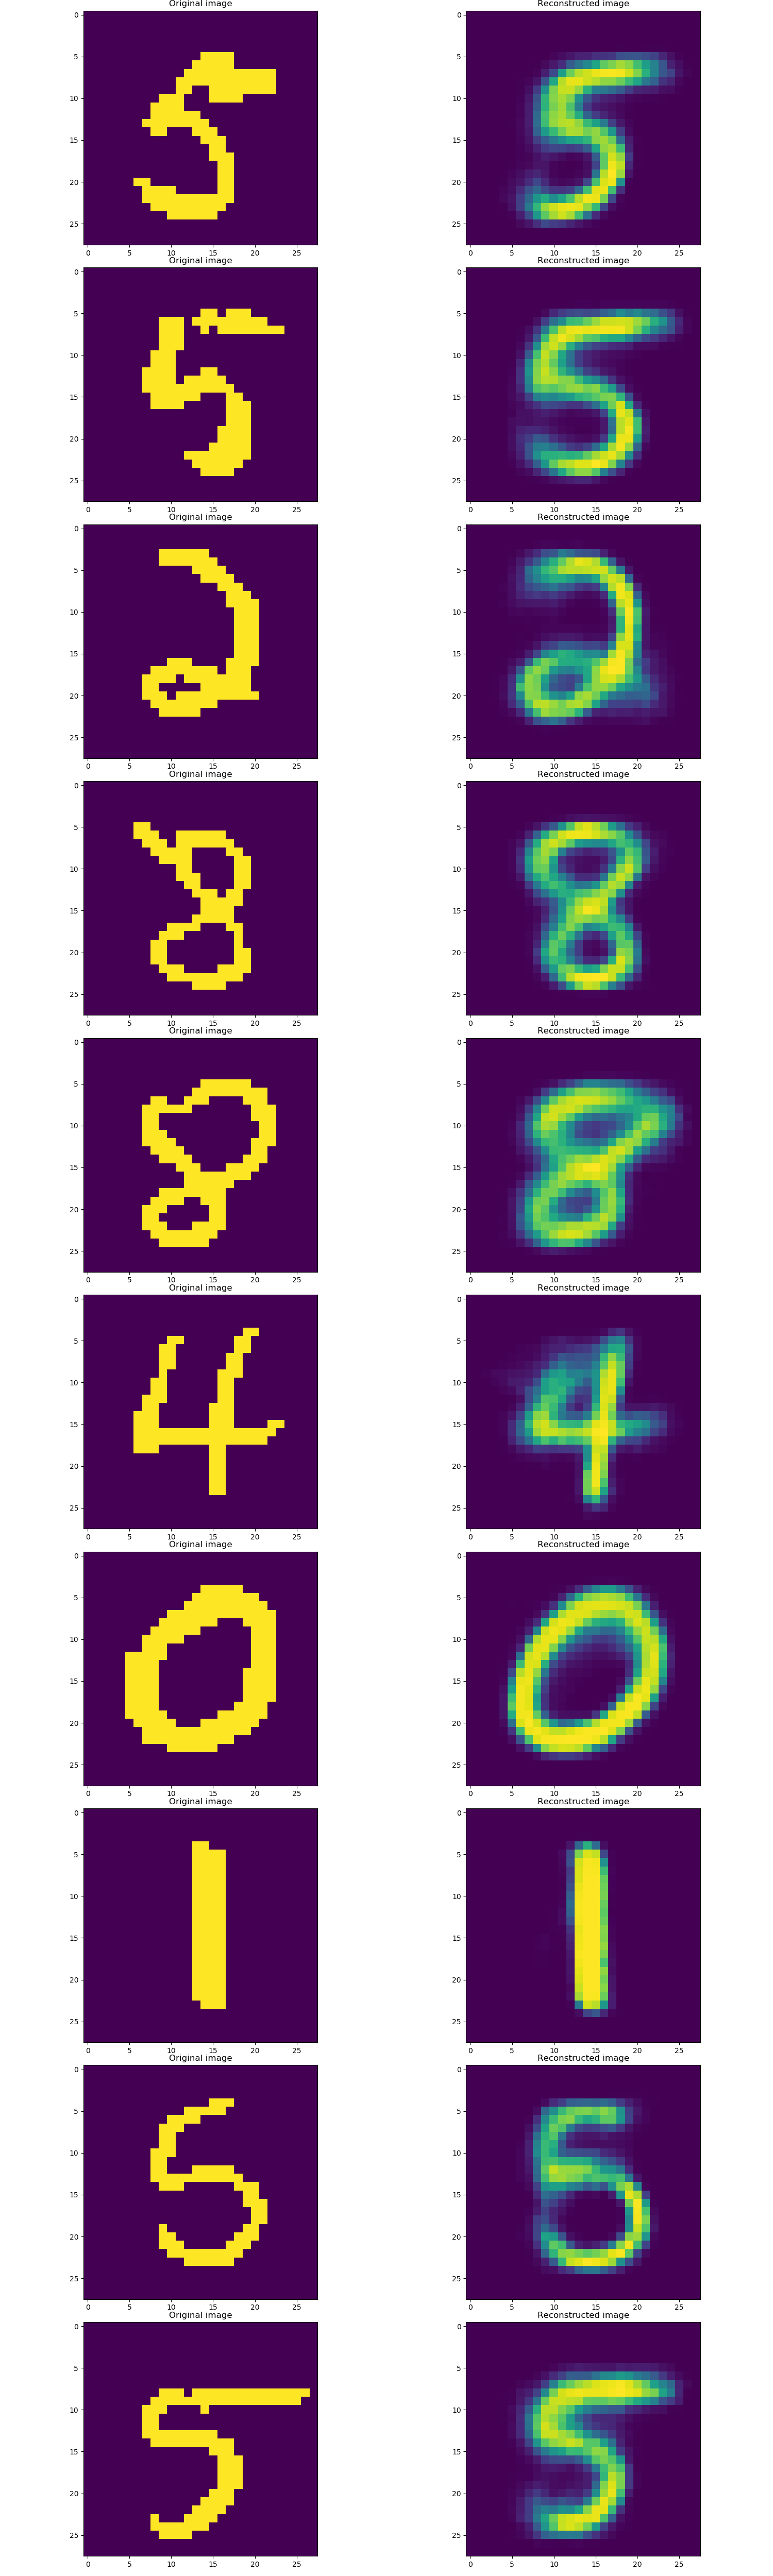

In [23]:
print(device)
X,_ = next(iter(test_loader))
X_hat, mu, sigma = svi.model(X.to(device))
X_hat = X_hat.cpu().detach().numpy()
X_hat = X_hat.reshape(-1, 28, 28)

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].imshow(X[i].reshape(28, 28))
    axes[i][0].set_title('Original image')
    axes[i][1].imshow(X_hat[i])
    axes[i][1].set_title('Reconstructed image')

cuda:0


<IPython.core.display.Javascript object>


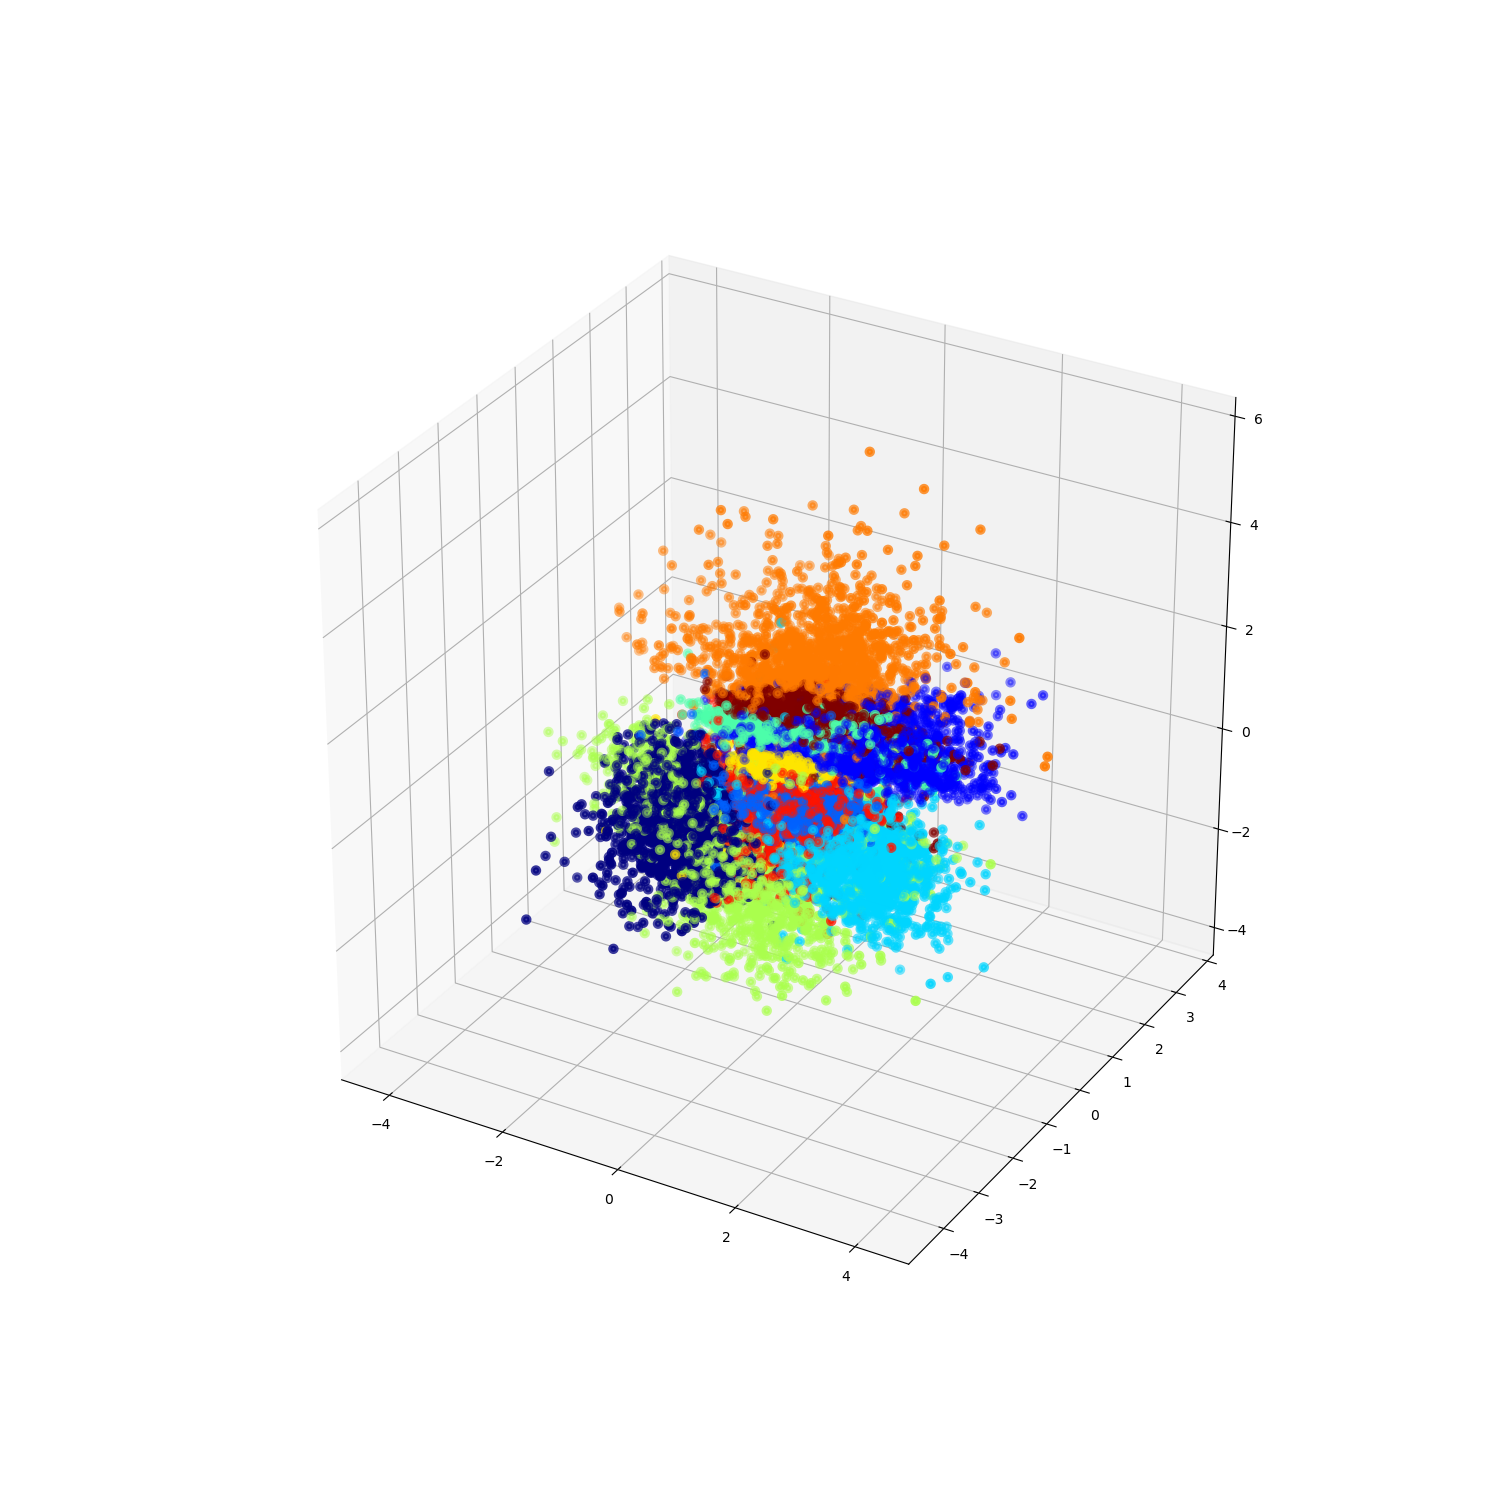

In [28]:
print(device)
X, cl = torch.from_numpy(test.dataset), test.labels
                        
Z_hat, mu, sigma = svi.model.encoder(X.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, cmap=plt.cm.jet,lw=3)
plt.show()

# Mark. II

In [29]:
deepmodel1 = v.DeepVAE(latent_dim=4, encoder_dims=[400, 200])
svi1 = v.SVI(
            vae_model=deepmodel1,
            optimizer=torch.optim.Adam(deepmodel1.parameters(), lr=1e-3),
            loss_function="BCE",
            verbose=True
            )

In [30]:
loss_hist1 = svi1(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=True)

Epoch [1/50], average_loss:172.8048, validation_loss:139.4379
Epoch [2/50], average_loss:134.7223, validation_loss:130.7622
Epoch [3/50], average_loss:128.5489, validation_loss:126.1843
Epoch [4/50], average_loss:125.0087, validation_loss:123.7837
Epoch [5/50], average_loss:122.5836, validation_loss:121.5272
Epoch [6/50], average_loss:120.5807, validation_loss:120.1940
Epoch [7/50], average_loss:118.9810, validation_loss:119.0627
Epoch [8/50], average_loss:117.6585, validation_loss:118.0707
Epoch [9/50], average_loss:116.5114, validation_loss:116.9807
Epoch [10/50], average_loss:115.5607, validation_loss:116.4409
Epoch [11/50], average_loss:114.6808, validation_loss:116.2024
Epoch [12/50], average_loss:113.9116, validation_loss:115.4508
Epoch [13/50], average_loss:113.1429, validation_loss:115.0651
Epoch [14/50], average_loss:112.5795, validation_loss:114.7693
Epoch [15/50], average_loss:112.1267, validation_loss:114.4875
Epoch [16/50], average_loss:111.5117, validation_loss:114.0478
E

cuda:0


<IPython.core.display.Javascript object>


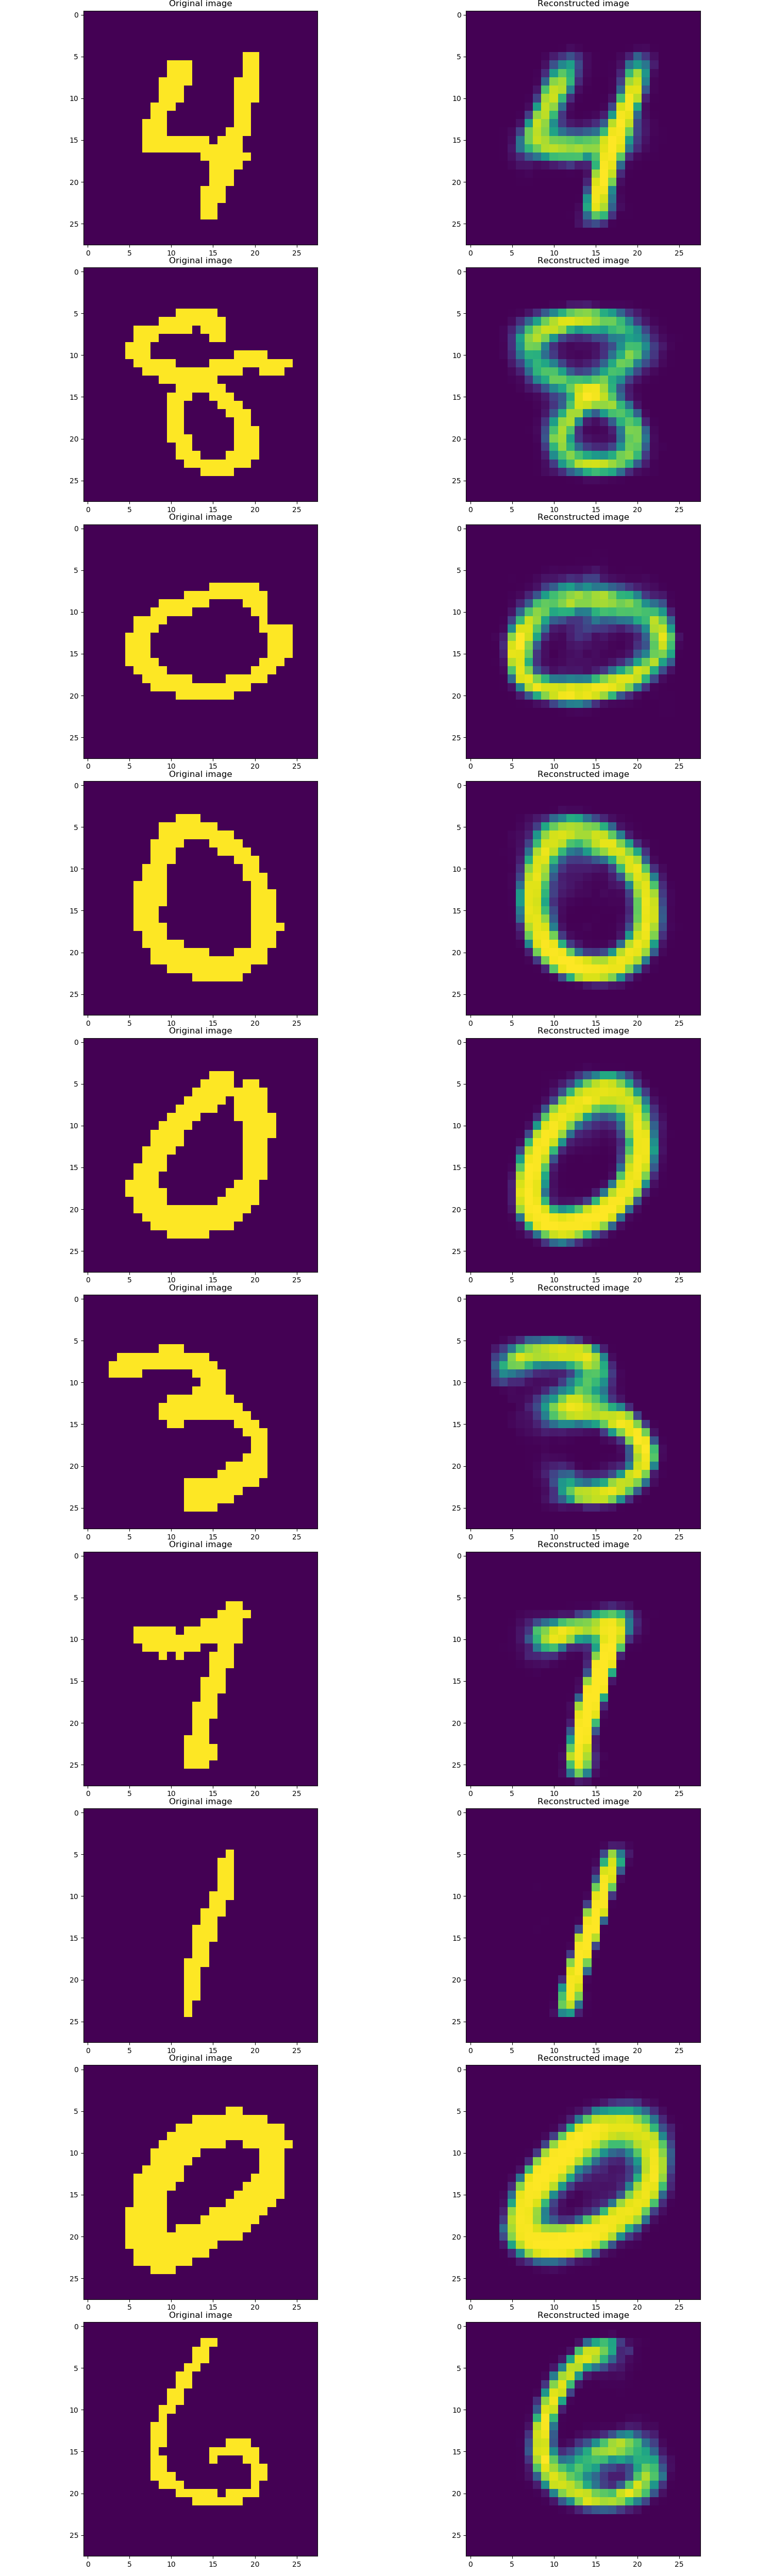

In [31]:
print(device)
X,_ = next(iter(test_loader))
X_hat, mu, sigma = svi1.model(X.to(device))
X_hat = X_hat.cpu().detach().numpy()
X_hat = X_hat.reshape(-1, 28, 28)

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].imshow(X[i].reshape(28, 28))
    axes[i][0].set_title('Original image')
    axes[i][1].imshow(X_hat[i])
    axes[i][1].set_title('Reconstructed image')

cuda:0


<IPython.core.display.Javascript object>


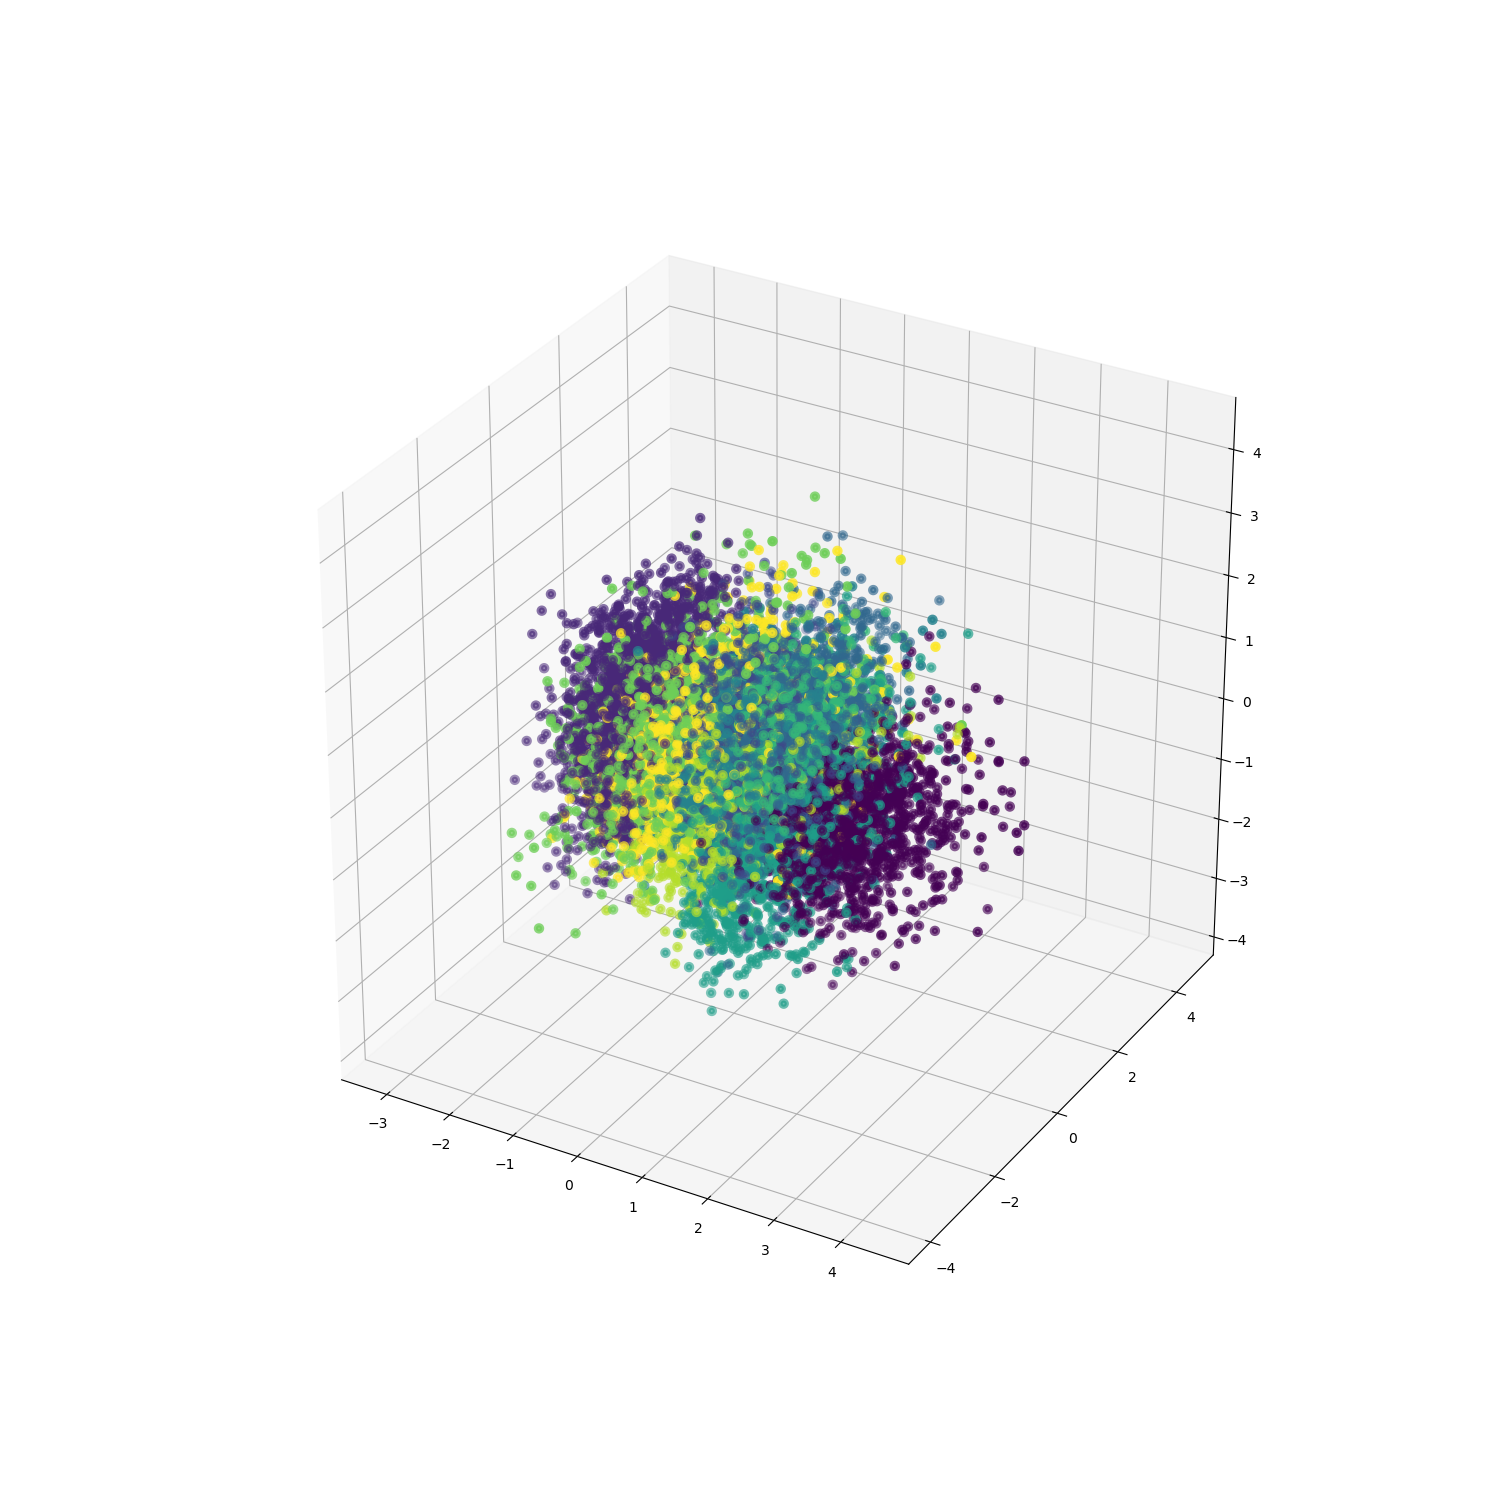

In [36]:
print(device)
X, cl = torch.from_numpy(test.dataset), test.labels
                        
Z_hat, mu, sigma = svi1.model.encoder(X.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
ax.scatter(mu[:,1], mu[:,2], mu[:,3], c=cl,lw=3)